# Monopoly

Demonstration of the trading in pairs based on flipping a coin. At some point, many will lose and the money will be concentrated in the hands of a few.

  0%|          | 0/1000001 [00:00<?, ?it/s]

,money,count
0,10,1000


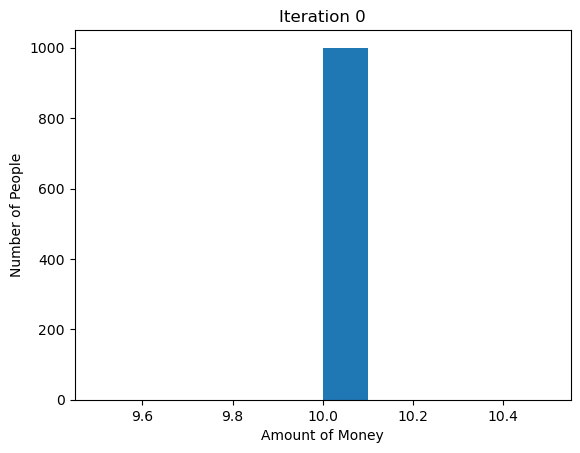

,money,count
0,10,942
1,11,28
2,9,28
3,8,1
4,12,1


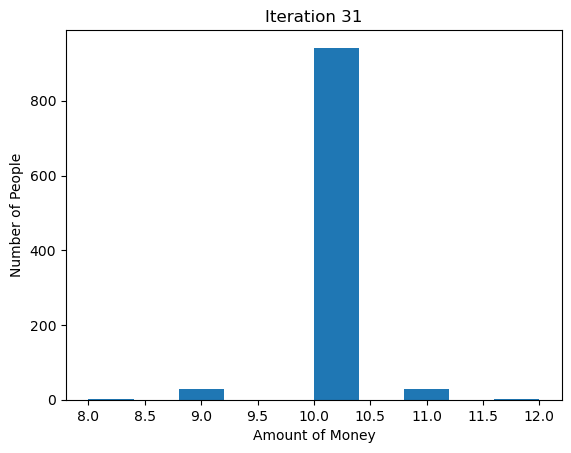

,money,count
1,10,319
2,11,214
0,9,205
5,12,94
3,8,91
6,7,35
4,13,27
7,14,9
8,6,3
9,5,3


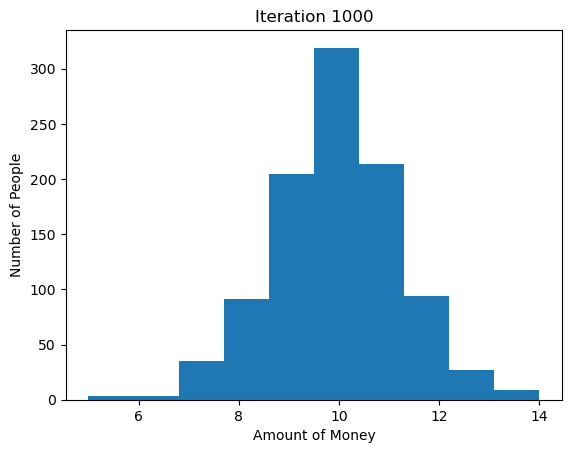

,money,count
1,0,224
8,13,55
22,8,54
11,10,53
17,12,51
13,11,48
0,16,47
5,15,46
2,9,43
4,14,37


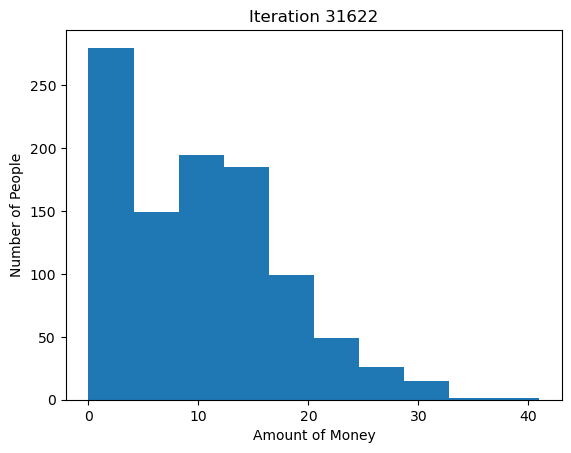

,money,count
1,0,938
0,132,2
10,166,2
40,107,2
29,232,2
5,26,1
45,59,1
34,122,1
35,243,1
36,61,1


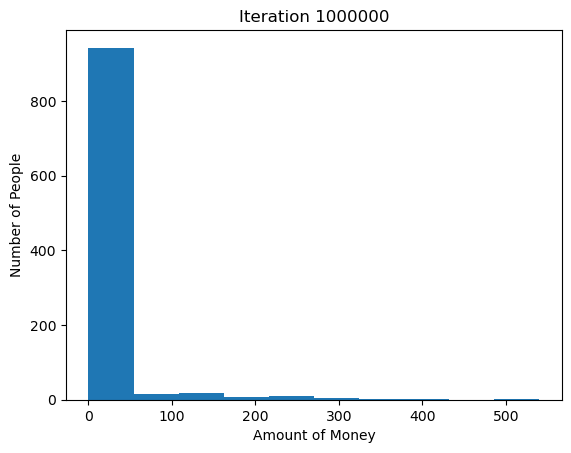

In [17]:
import random
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from tqdm.notebook import tqdm


INITIAL_MONEY = 10
NUM_PEOPLE = 1000
NUM_PLOTS = 5
NUM_TRIALS = 1_000_000

plots_at = np.logspace(0, np.log10(NUM_TRIALS), 5).astype(int).tolist()
plots_at[0] = 0

money_list = [INITIAL_MONEY] * NUM_PEOPLE

for i in tqdm(range(NUM_TRIALS + 1)):
    if i in plots_at:
        counts = Counter(money_list)

        data = pd.DataFrame.from_dict(counts, orient="index").reset_index()
        data = data.rename(columns={"index": "money", 0: "count"})
        data = data.sort_values("count", ascending=False)
        display(data)

        plt.figure()
        plt.hist(money_list)
        plt.title(f"Iteration {i}")
        plt.xlabel("Amount of Money")
        plt.ylabel("Number of People")

        plt.show()

    people_with_money = [i for i, x in enumerate(money_list) if x > 0]
    a, b = random.sample(people_with_money, 2)
    coin_flip = random.randint(0, 1)
    if coin_flip == 0:
        money_list[a] += 1
        money_list[b] -= 1
    else:
        money_list[a] -= 1
        money_list[b] += 1